# SARIMAX Model made for this Machine Learning Web Application

## Data Wrapping

Insert our data in txt format and read it as a Pandas Dataframe

In [59]:
import warnings
import itertools
import pandas as pd
import numpy as np
from pandas import read_csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df = pd.read_csv('/Users/mac/Documents/PyCharmProjects/ShampoSalesPrediction/DMT_TT1_F_VERKOPEN.txt', sep=";",decimal=',')
df

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,ORDER_NUMMER,BIJDRAGE,NETTO_GEWICHT_KG,FACTUUR_DATUM,R1_GEVAL
0,130099,100017,313037,110.8816,204.0,31/05/2012,0
1,130120,100017,313217,4.5593,6.0,31/05/2012,0
2,130275,100017,313254,91.8450,204.0,31/05/2012,0
3,130116,100017,313427,26.3588,36.0,02/06/2012,0
4,130406,100017,313587,4.5541,6.0,02/06/2012,0
...,...,...,...,...,...,...,...
1939689,766188,44595296,608430,898.5053,627.3,20/11/2019,0
1939690,766188,44595296,607884,348.0530,243.0,14/11/2019,0
1939691,451776,44505941,601416,8.6170,20.0,14/09/2019,1
1939692,130603,44505941,602450,91.6640,40.0,24/09/2019,1


Calculating the total number of clients and products in our dataset

In [60]:
Clients = df.LKP_SOLD_TO_CUST.unique()
Products = df.LKP_ARTIKEL.unique()

In [61]:
len(Clients)

1704

In [62]:
len(Products)

2736

Selecting our mean columns for our analysis

In [63]:
df = df[['LKP_ARTIKEL','NETTO_GEWICHT_KG','FACTUUR_DATUM']]
df.head()

,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,100017,204.0,31/05/2012
1,100017,6.0,31/05/2012
2,100017,204.0,31/05/2012
3,100017,36.0,02/06/2012
4,100017,6.0,02/06/2012


Converting our date column into a date format

In [64]:
df['FACTUUR_DATUM'] = pd.to_datetime(df.FACTUUR_DATUM)
df.head()

,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,100017,204.0,2012-05-31
1,100017,6.0,2012-05-31
2,100017,204.0,2012-05-31
3,100017,36.0,2012-02-06
4,100017,6.0,2012-02-06


In [65]:
df = df.reset_index(drop=True)
df.head()

,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,100017,204.0,2012-05-31
1,100017,6.0,2012-05-31
2,100017,204.0,2012-05-31
3,100017,36.0,2012-02-06
4,100017,6.0,2012-02-06


Verifying our data types

In [7]:
df.dtypes

LKP_ARTIKEL                  int64
NETTO_GEWICHT_KG           float64
FACTUUR_DATUM       datetime64[ns]
dtype: object

Showing the order with the maximun amount of Kg during all the data set period

In [8]:
df.loc[df['NETTO_GEWICHT_KG'].idxmax()]

LKP_ARTIKEL                      953979
NETTO_GEWICHT_KG            5.23721e+08
FACTUUR_DATUM       2017-09-19 00:00:00
Name: 262353, dtype: object

Making a plot of all our data set

(0, 29000)

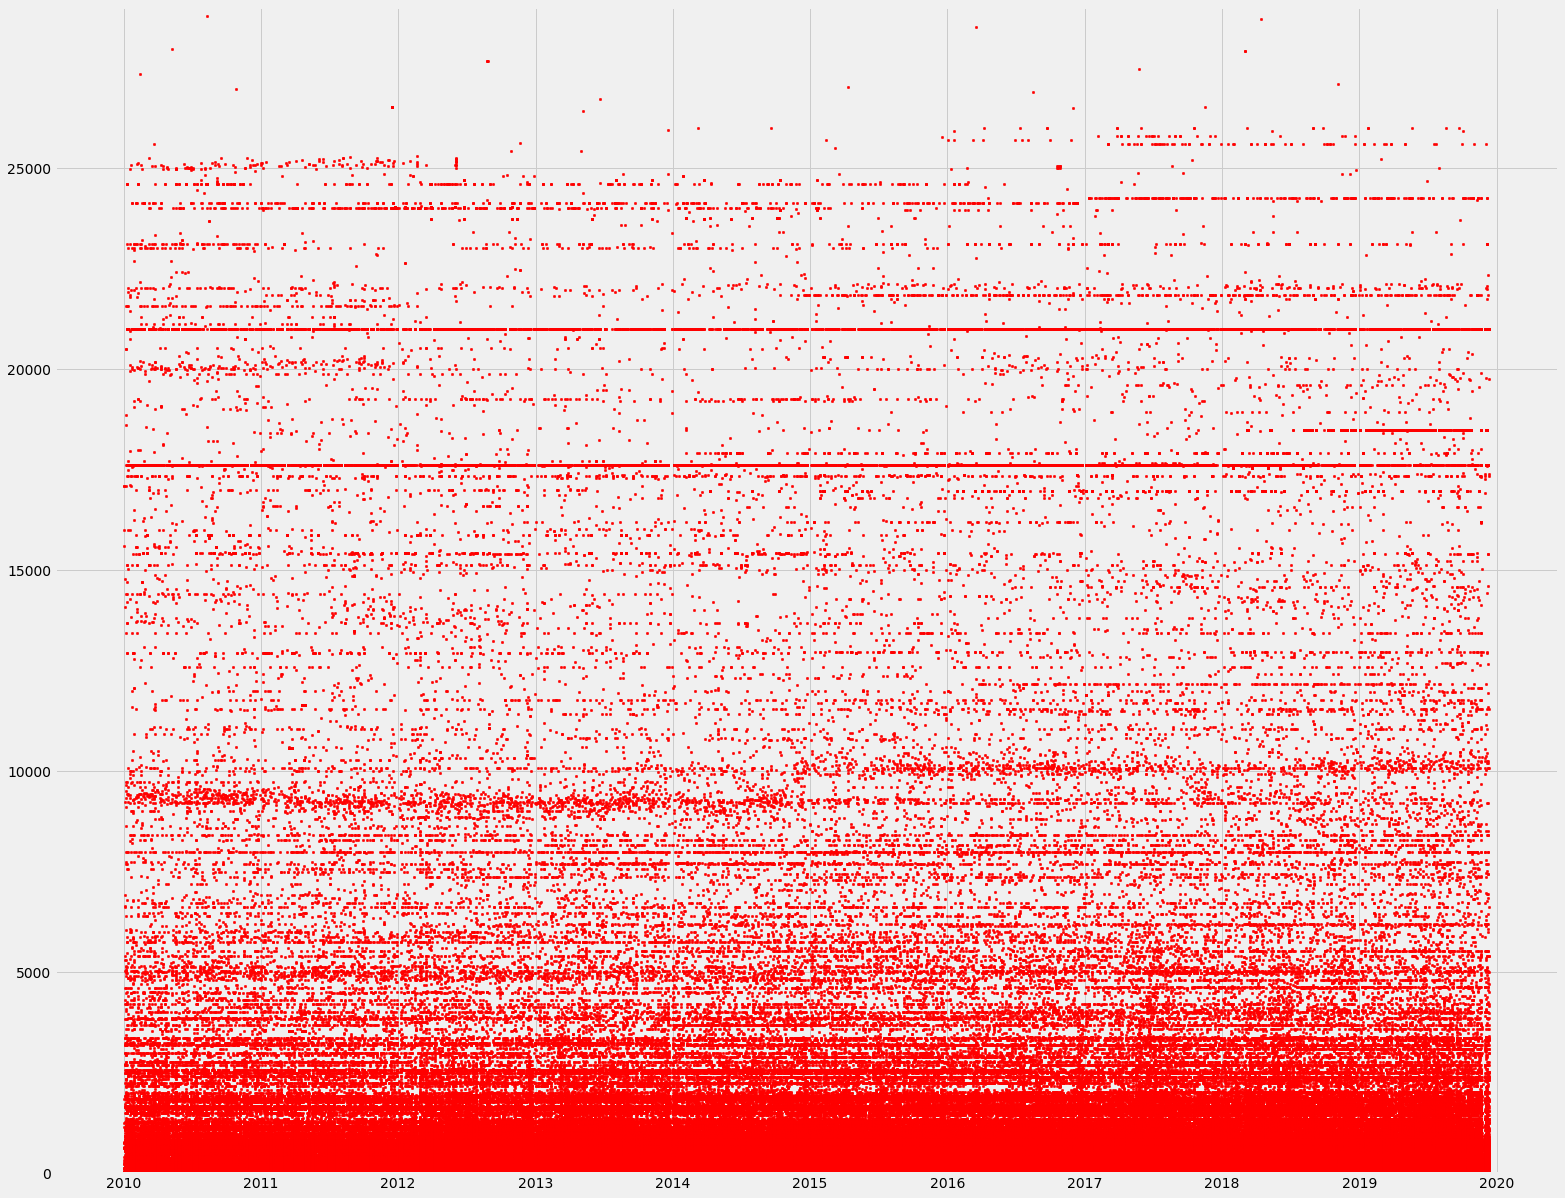

In [66]:
df_FACTUUR_DATUM = df["FACTUUR_DATUM"].tolist()
df_NETTO_GEWICHT_KG = df["NETTO_GEWICHT_KG"].tolist()
dates = [pd.to_datetime(d) for d in df_FACTUUR_DATUM]
plt.figure(figsize=(24,20))
plt.scatter(dates, df_NETTO_GEWICHT_KG, s =6, c = 'red')
plt.ylim(0,29000)

In [67]:
df = df.reset_index(drop=True)
df.head()

,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,100017,204.0,2012-05-31
1,100017,6.0,2012-05-31
2,100017,204.0,2012-05-31
3,100017,36.0,2012-02-06
4,100017,6.0,2012-02-06


### Selecting data only for the product 100017

In [77]:
dfp_100017 = df.loc[df['LKP_ARTIKEL']==100017]
dfp_100017.head()

,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,100017,204.0,2012-05-31
1,100017,6.0,2012-05-31
2,100017,204.0,2012-05-31
3,100017,36.0,2012-02-06
4,100017,6.0,2012-02-06


We have 2723 orders of this product during all the data set period.

In [78]:
dfp_100017.shape

(2723, 3)

In [79]:
dfp_100017 = dfp_100017[['LKP_ARTIKEL','NETTO_GEWICHT_KG','FACTUUR_DATUM']]

In [80]:
dfp_100017.head()

,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,100017,204.0,2012-05-31
1,100017,6.0,2012-05-31
2,100017,204.0,2012-05-31
3,100017,36.0,2012-02-06
4,100017,6.0,2012-02-06


Verifying again our data types

In [81]:
dfp_100017.dtypes

LKP_ARTIKEL                  int64
NETTO_GEWICHT_KG           float64
FACTUUR_DATUM       datetime64[ns]
dtype: object

Now we sum all the orders of the same month and show the first 5 rows of the Dataframe with the total orders per month.

In [82]:
dfp_100017 = dfp_100017.groupby(['LKP_ARTIKEL','FACTUUR_DATUM']).sum()
dfp_100017.head()

NETTO_GEWICHT_KG
LKP_ARTIKEL FACTUUR_DATUM                  
100017      2010-01-04                  6.0
            2010-01-06                 24.0
            2010-01-09               1020.0
            2010-01-10                246.0
            2010-01-11                306.0

In [83]:
dfp_100017 = dfp_100017.reset_index(level=['FACTUUR_DATUM'])

In [84]:
dfp_100017.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
LKP_ARTIKEL,,
100017,2010-01-04,6.0
100017,2010-01-06,24.0
100017,2010-01-09,1020.0
100017,2010-01-10,246.0
100017,2010-01-11,306.0


Sorting our data ascendingly by Date

In [85]:
dfp_100017 = dfp_100017.sort_values(by='FACTUUR_DATUM') 
dfp_100017.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
LKP_ARTIKEL,,
100017,2010-01-04,6.0
100017,2010-01-06,24.0
100017,2010-01-09,1020.0
100017,2010-01-10,246.0
100017,2010-01-11,306.0


Plot of all orders during all the data set time of the product 100017

(0, 900)

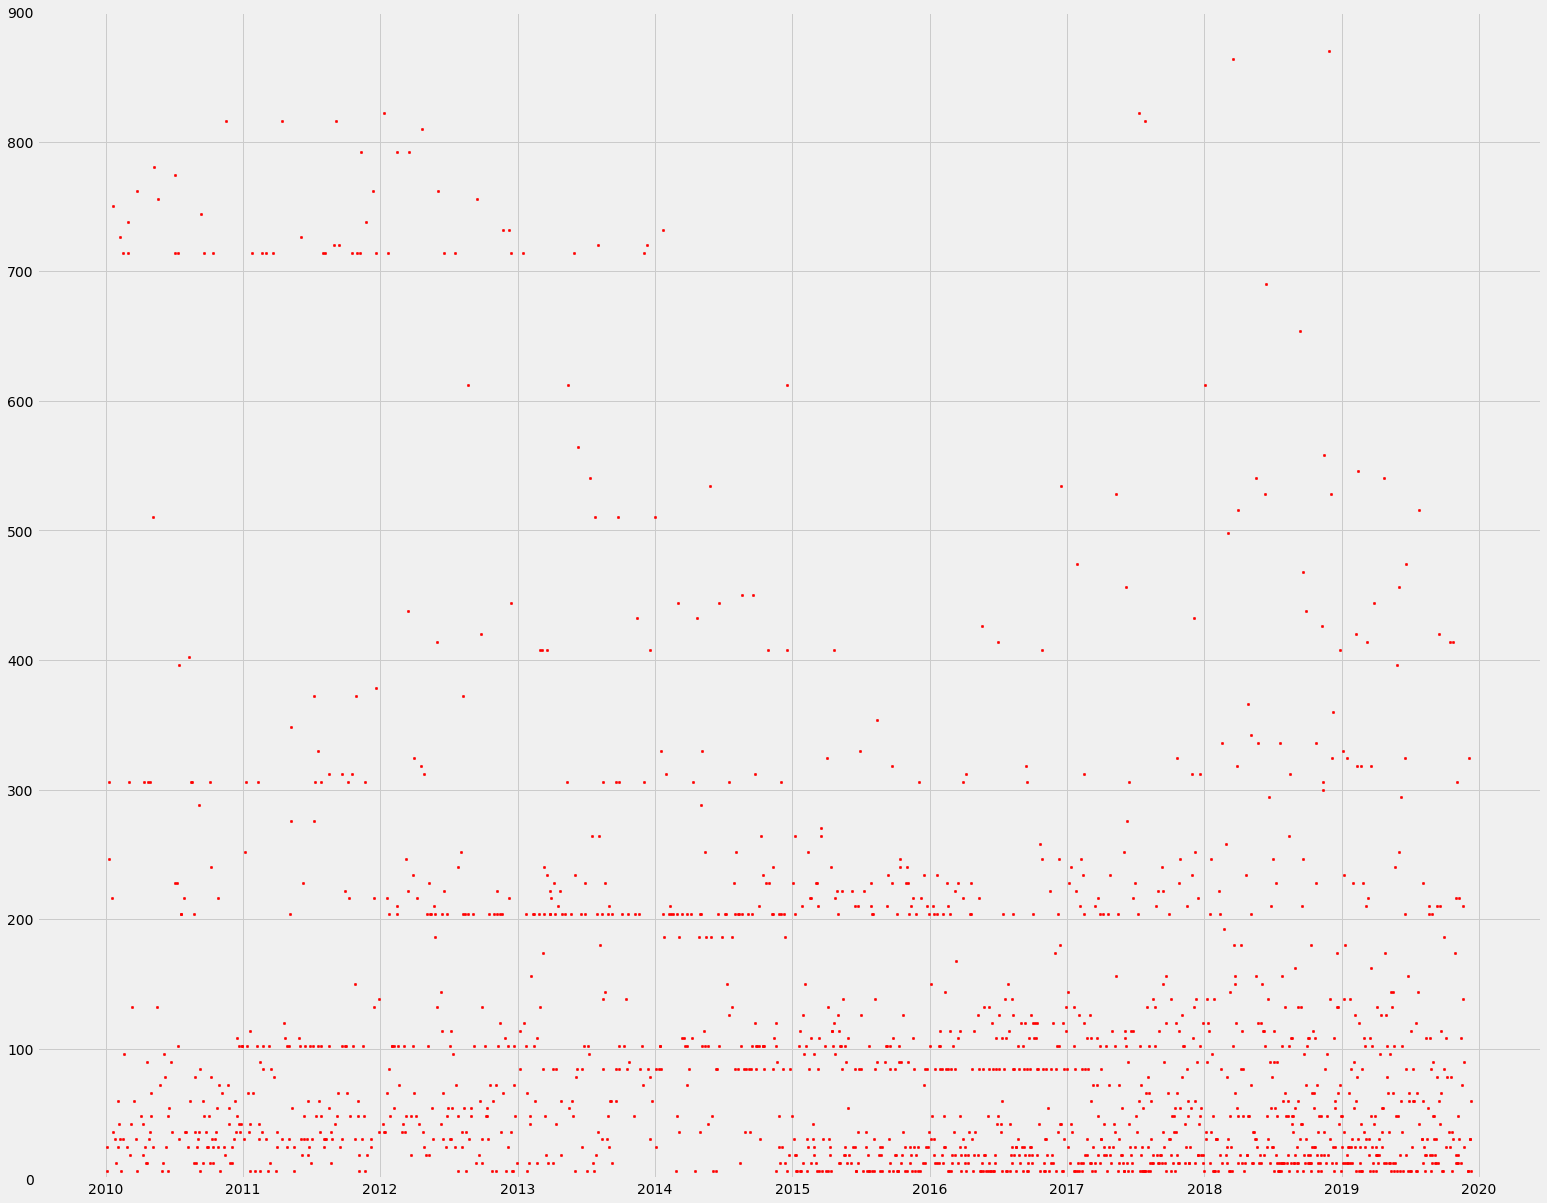

In [86]:
dfp_100017_FACTUUR_DATUM = dfp_100017["FACTUUR_DATUM"].tolist()
dfp_100017_NETTO_GEWICHT_KG = dfp_100017["NETTO_GEWICHT_KG"].tolist()
dfp_100017_dates = [pd.to_datetime(d) for d in dfp_100017_FACTUUR_DATUM]
plt.figure(figsize=(24,20))
plt.scatter(dfp_100017_dates, dfp_100017_NETTO_GEWICHT_KG, s =6, c = 'red')
plt.ylim(0,900)

In [87]:
dfp_100017.dtypes

FACTUUR_DATUM       datetime64[ns]
NETTO_GEWICHT_KG           float64
dtype: object

### Saving our dataset into a csv file

In [88]:
dfp_100017.to_csv("/Users/mac/Documents/PyCharmProjects/ShampoSalesPrediction/dfp_100017_monthlyFinalSARIMAXSellsPrediction.csv")

## Data Wrapping (Product: 100017)

Calling our Dataframe

In [90]:
import pandas as pd
import numpy as np
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#read the file
df = pd.read_csv("/Users/mac/Documents/PyCharmProjects/ShampoSalesPrediction/dfp_100017_monthlyFinalSARIMAXSellsPrediction.csv")

#print the head
df.head()

,LKP_ARTIKEL,FACTUUR_DATUM,NETTO_GEWICHT_KG
0,100017,2010-01-04,6.0
1,100017,2010-01-06,24.0
2,100017,2010-01-09,1020.0
3,100017,2010-01-10,246.0
4,100017,2010-01-11,306.0


Selecting our mean columns

In [91]:
df = df[['FACTUUR_DATUM','NETTO_GEWICHT_KG']]
df.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
0,2010-01-04,6.0
1,2010-01-06,24.0
2,2010-01-09,1020.0
3,2010-01-10,246.0
4,2010-01-11,306.0


Verifying our data types

In [92]:
df.dtypes

FACTUUR_DATUM        object
NETTO_GEWICHT_KG    float64
dtype: object

In [93]:
df['FACTUUR_DATUM'] = pd.to_datetime(df.FACTUUR_DATUM,format='%Y-%m-%d')

In [94]:
df.dtypes

FACTUUR_DATUM       datetime64[ns]
NETTO_GEWICHT_KG           float64
dtype: object

In [95]:
df.index = df['FACTUUR_DATUM'] 
df.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
FACTUUR_DATUM,,
2010-01-04,2010-01-04,6.0
2010-01-06,2010-01-06,24.0
2010-01-09,2010-01-09,1020.0
2010-01-10,2010-01-10,246.0
2010-01-11,2010-01-11,306.0


Resampling our Dataframe by month

In [96]:
df = df.resample('M').sum()
df

,NETTO_GEWICHT_KG
FACTUUR_DATUM,
2010-01-31,4404.0
2010-02-28,2772.0
2010-03-31,7638.0
2010-04-30,2556.0
2010-05-31,2394.0
...,...
2019-08-31,1572.0
2019-09-30,1506.0
2019-10-31,1824.0


In [97]:
df = df.reset_index(level=['FACTUUR_DATUM'])
df

,FACTUUR_DATUM,NETTO_GEWICHT_KG
0,2010-01-31,4404.0
1,2010-02-28,2772.0
2,2010-03-31,7638.0
3,2010-04-30,2556.0
4,2010-05-31,2394.0
...,...,...
115,2019-08-31,1572.0
116,2019-09-30,1506.0
117,2019-10-31,1824.0
118,2019-11-30,1326.0


### Saving our data into a csv files

In [98]:
df.to_csv('/Users/mac/Documents/PyCharmProjects/ShampoSalesPrediction/dfp_100017_monthlyFinalSARIMAXSellsPrediction2.csv', index=False)

## Applying SARIMAX Model

Calling and plotting our data

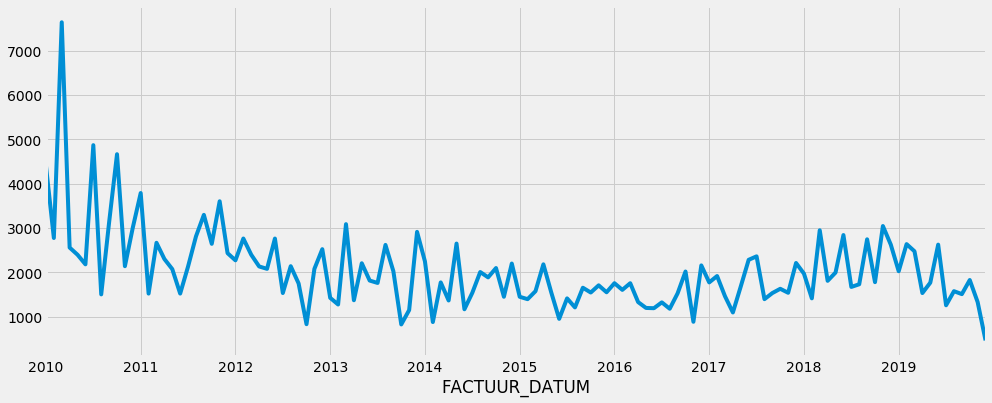

In [99]:
import warnings
import itertools
import pandas as pd
import numpy as np
from pandas import read_csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

y = read_csv('/Users/mac/Documents/PyCharmProjects/ShampoSalesPrediction/dfp_100017_monthlyFinalSARIMAXSellsPrediction2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
y.plot(figsize=(15, 6))
plt.show()

In [100]:
print(y)

FACTUUR_DATUM
2010-01-31    4404.0
2010-02-28    2772.0
2010-03-31    7638.0
2010-04-30    2556.0
2010-05-31    2394.0
               ...  
2019-08-31    1572.0
2019-09-30    1506.0
2019-10-31    1824.0
2019-11-30    1326.0
2019-12-31     462.0
Name: NETTO_GEWICHT_KG, Length: 120, dtype: float64


Defining some variables

In [101]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Searching for the best parameters for our model

In [102]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

### Creating and fitting the model

In [103]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0341      0.152     -0.224      0.823      -0.332       0.264
ma.L1         -0.7861      0.105     -7.491      0.000      -0.992      -0.580
ar.S.L12       0.3120      0.122      2.558      0.011       0.073       0.551
ma.S.L12      -0.8571      0.244     -3.519      0.000      -1.334      -0.380
sigma2      4.007e+05   8.36e+04      4.795      0.000    2.37e+05    5.64e+05


## Testing our model

In [104]:
pred = results.get_prediction(start=pd.to_datetime('2015-09-30'), dynamic=False)
pred_ci = pred.conf_int()

In [105]:
y

FACTUUR_DATUM
2010-01-31    4404.0
2010-02-28    2772.0
2010-03-31    7638.0
2010-04-30    2556.0
2010-05-31    2394.0
               ...  
2019-08-31    1572.0
2019-09-30    1506.0
2019-10-31    1824.0
2019-11-30    1326.0
2019-12-31     462.0
Name: NETTO_GEWICHT_KG, Length: 120, dtype: float64

### Blue line is real data and orange line is predicted data of our model

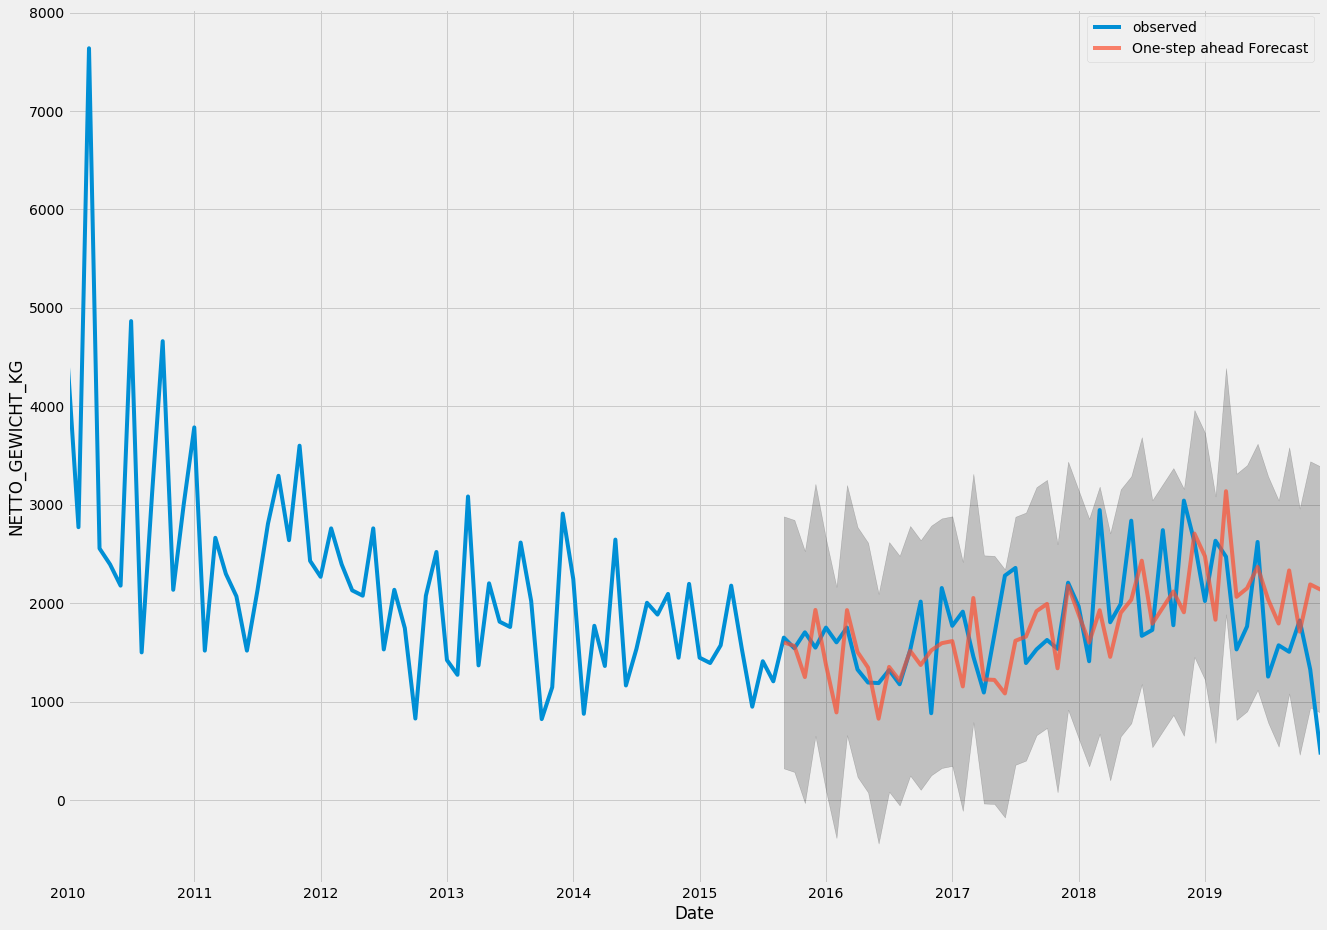

In [106]:
ax = y['2010':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('NETTO_GEWICHT_KG')
plt.legend()

plt.show()

In [107]:
df_forecasted = pred.predicted_mean
df_truth = y['2015-09-30':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 328869.81


## Future prediction: Unseen data

Predicting sales for the next 15 months

In [114]:
# Get forecast 500 steps ahead in future

pred_uc = results.get_forecast(15)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [115]:
pred_uc

In [116]:
pred_ci

,lower NETTO_GEWICHT_KG,upper NETTO_GEWICHT_KG
2020-01-31,142.499103,2643.596624
2020-02-29,67.533318,2607.357597
2020-03-31,477.000874,3068.463162
2020-04-30,-456.875932,2185.539796
2020-05-31,-258.920987,2433.611878
2020-06-30,107.117327,2848.918712
2020-07-31,-501.253213,2289.000353
2020-08-31,-489.398016,2348.539405
2020-09-30,-352.342277,2532.571233
2020-10-31,-321.216733,2610.040779


## Predicted sales for the next 15 months

In [117]:
pred_ci['Prediction'] = pred_ci[['lower NETTO_GEWICHT_KG', 'upper NETTO_GEWICHT_KG']].mean(axis=1)
pred_ci

,lower NETTO_GEWICHT_KG,upper NETTO_GEWICHT_KG,Prediction
2020-01-31,142.499103,2643.596624,1393.047864
2020-02-29,67.533318,2607.357597,1337.445458
2020-03-31,477.000874,3068.463162,1772.732018
2020-04-30,-456.875932,2185.539796,864.331932
2020-05-31,-258.920987,2433.611878,1087.345445
2020-06-30,107.117327,2848.918712,1478.018019
2020-07-31,-501.253213,2289.000353,893.873570
2020-08-31,-489.398016,2348.539405,929.570695
2020-09-30,-352.342277,2532.571233,1090.114478
2020-10-31,-321.216733,2610.040779,1144.412023


## Future prediction plot

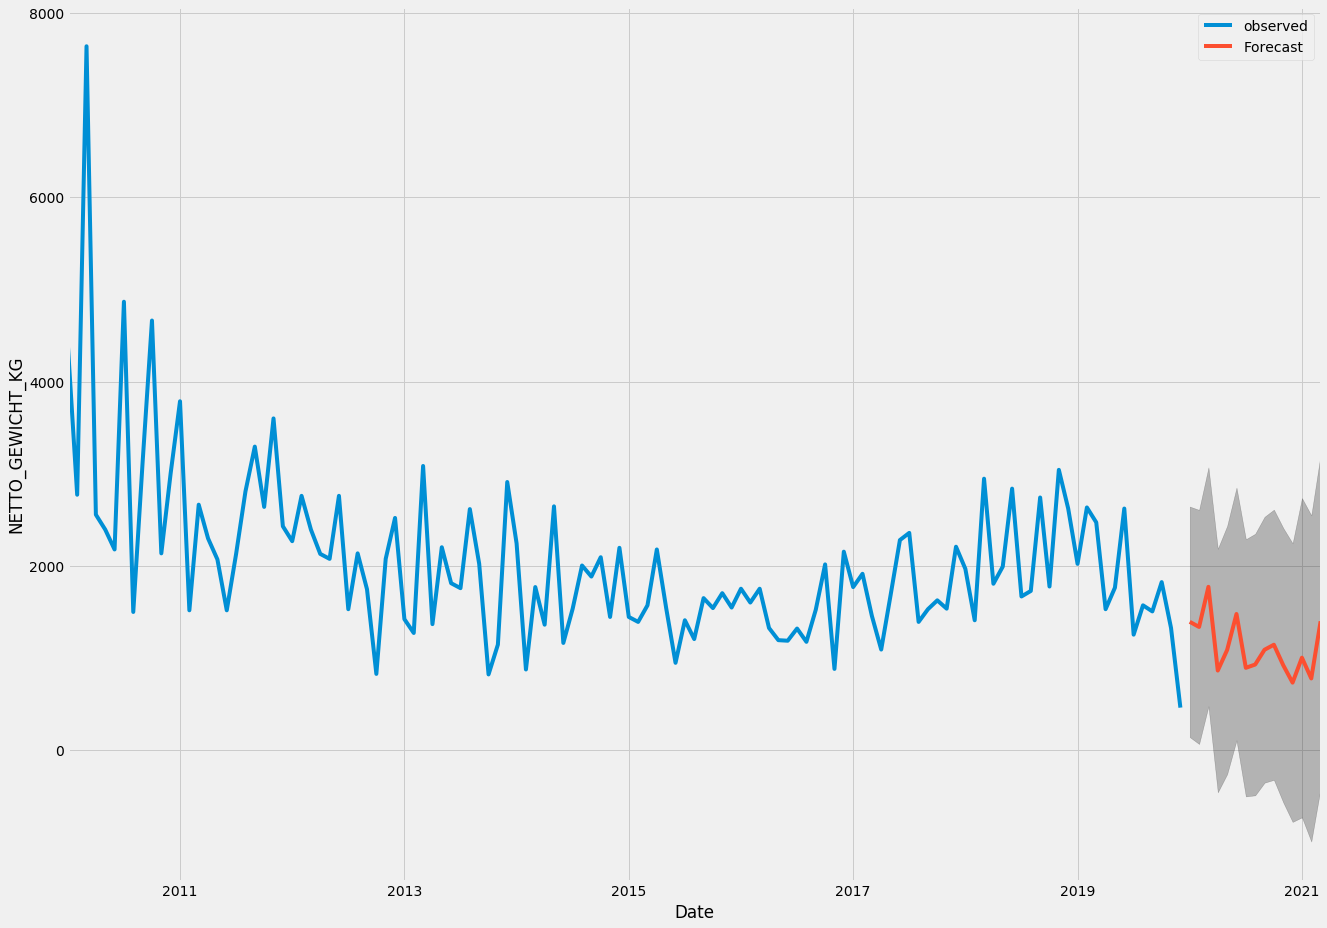

In [118]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('NETTO_GEWICHT_KG')

plt.legend()
plt.show()